In [1]:
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
from astropy import units as unit
import sys

In [2]:
datadir = '/media/juan/Pesquisa/Pesquisa/SNAPSHOTS'
limites_densidad = {'G0':(0,20), 'G1':(0,25), 'G2':(0,20), 'G3':(0,55)}

In [4]:
#for gal in ['G0','G1','G2','G3']:
for gal in ['G0','G1']:
    snap = '500'
    print(gal, ' -- >> ' ,snap)
    print('\n')
    
    data = pynbody.load(datadir+'/'+gal+'/'+gal+'_snapshot_'+snap+'.hdf5')
    
    print('GAS')
    print('Masa TOTAL: ',data.gas['mass'].sum())
    print('Masa individuales',np.unique(data.gas['mass']))
    print('Num. particles', data.gas['mass'].size)
    print('\n')
    
    print('STARS')
    print('Masa TOTAL: ',data.star['mass'].sum())
    print('Masa individuales',np.unique(data.star['mass']))
    print('Num. particles', data.star['mass'].size)
    print('\n')    
    
    print('DM')
    print('Masa TOTAL: ',data.dm['mass'].sum())
    print('Masa individuales',np.unique(data.dm['mass']))
    print('Num. particles', data.dm['mass'].size)
    print('\n')
  
    
    #snap = '600'
    #data = pynbody.load(datadir+'/'+gal+'/snapshot_'+snap+'.hdf5')
    #print(np.unique(data.gas['mass']))
    

G0  -- >>  500




/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/juan/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(


GAS
Masa TOTAL:  0.054796334
Masa individuales [4.999621e-07]
Num. particles 109601


STARS
Masa TOTAL:  0.10519151
Masa individuales [4.999621e-07]
Num. particles 210399


DM
Masa TOTAL:  5.099621
Masa individuales [3.9997035e-06]
Num. particles 1275000


G1  -- >>  500


GAS
Masa TOTAL:  0.16300917
Masa individuales [1.611351e-06]
Num. particles 101163


STARS
Masa TOTAL:  0.53709507
Masa individuales [1.6034644e-06 1.6113510e-06]
Num. particles 334837


DM
Masa TOTAL:  20.00327
Masa individuales [4.0006476e-06]
Num. particles 5000000




# Leídos directamente de los archivos "param.txt-usedvalues"

SofteningGas                       0.1  
SofteningHalo                      0.4  
SofteningDisk                      0.1  
SofteningBulge                     0.1  
SofteningStars                     0.1  
SofteningBndry                     0.1  

In [81]:
gal = 'G3'
snap = '600'
data = pynbody.load(datadir+'/'+gal+'/snapshot_'+snap+'.hdf5')

In [82]:
data.properties

{'a': 1.0,
 'omegaM0': 0.0,
 'omegaL0': 0.0,
 'boxsize': Unit("0.00e+00 kpc"),
 'h': 1.0,
 'time': Unit("9.78e+00 Gyr"),
 'Flag_Cooling': 1,
 'Flag_DoublePrecision': 0,
 'Flag_Feedback': 1,
 'Flag_IC_Info': 0,
 'Flag_Metals': 1,
 'Flag_Sfr': 1,
 'Flag_StellarAge': 1,
 'MassTable': array([0.00000000e+00, 9.30290660e-04, 6.56517937e-05, 9.33216683e-05,
        0.00000000e+00, 0.00000000e+00]),
 'NumFilesPerSnapshot': 1,
 'NumPart_ThisFile': array([ 39412, 120000,  50000,  10000,  10588,      1], dtype=int32),
 'NumPart_Total': array([ 39412, 120000,  50000,  10000,  10588,      1], dtype=uint32),
 'NumPart_Total_HighWord': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'Redshift': 0.0}

In [85]:
np.unique(data.star['mass'])

SimArray([1.6004666e-05, 6.5651795e-05, 9.3321665e-05], dtype=float32, '1.00e+10 Msol')

In [3]:
gal = 'G0'
snap = '100'
data = pynbody.load(datadir+'/'+gal+'/snapshot_'+snap+'.hdf5')

In [ ]:
data = pynbody.load(datadir+'/'+gal+'/snapshot_'+snap+'.hdf5')

In [57]:
data.properties

{'a': 1.0,
 'omegaM0': 0.0,
 'omegaL0': 0.0,
 'boxsize': Unit("0.00e+00 kpc"),
 'h': 1.0,
 'time': Unit("9.78e+00 Gyr"),
 'Flag_Cooling': 1,
 'Flag_DoublePrecision': 0,
 'Flag_Feedback': 1,
 'Flag_IC_Info': 0,
 'Flag_Metals': 1,
 'Flag_Sfr': 1,
 'Flag_StellarAge': 1,
 'MassTable': array([0.00000000e+00, 9.30290660e-04, 6.56517937e-05, 9.33216683e-05,
        0.00000000e+00, 0.00000000e+00]),
 'NumFilesPerSnapshot': 1,
 'NumPart_ThisFile': array([ 39412, 120000,  50000,  10000,  10588,      1], dtype=int32),
 'NumPart_Total': array([ 39412, 120000,  50000,  10000,  10588,      1], dtype=uint32),
 'NumPart_Total_HighWord': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'Redshift': 0.0}

In [68]:
data.gas['acel']

KeyError: 'No array acel for family gas'

In [ ]:
plt.hist(data.gas['eps'])

In [54]:
len(np.unique(data.gas['smooth']))

39373

(array([1263., 2518., 2368., 1261.,  728.,  324.,  142.,   69.,   45.,
          27.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       dtype=float32),
 <BarContainer object of 10 artists>)

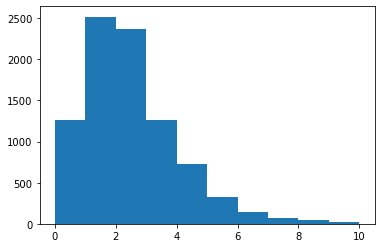

In [22]:
plt.hist(RGas(data),range=(0,10))

In [23]:
np.histogram?


In [ ]:
plt.hist(data.gas['smooth'],bins=20,range=(0,2))